In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
opt_train = pd.read_csv('optdigits.tra',header=None)

In [6]:
opt_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [15]:
def regularize(reg_param, theta, l):
    weight = np.square(theta)
    weight = np.sum(theta)
    weight = reg_param*weight
    return weight/(2*l)

In [16]:
def hypothesis(theta, X):
    z = np.dot(X, theta)
    return 1/(1+np.exp(-(z)))

In [17]:
def cost(X, y, theta, reg_param):
    y1 = hypothesis(theta, X)
    return (-(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1)))+regularize(reg_param,theta, len(X))

In [18]:
X= pd.concat([pd.Series(1, index=opt_train.index, name='00'), opt_train.iloc[:,:64]], axis=1)

In [19]:
y = opt_train.iloc[:,64]

In [20]:
y.unique()

array([0, 7, 4, 6, 2, 5, 8, 1, 9, 3])

In [21]:
y1 = np.zeros([opt_train.shape[0], len(y.unique())])
y1 = pd.DataFrame(y1)

In [22]:
for i in range(0, len(y.unique())):
    for j in range(0, len(y1)):
        if y[j] == y.unique()[i]:
            y1.iloc[j, i] = 1
        else: 
            y1.iloc[j, i] = 0
y1.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def gradient_descent(X, y, theta, alpha, epochs,reg_param):
    m = len(X)
    X = X.to_numpy(dtype='float128')
    X = pd.DataFrame(X)
    for i in range(0, epochs):
        for j in range(0, 10):
            theta = pd.DataFrame(theta)
            h = hypothesis(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= alpha*((reg_param/m)*theta.iloc[k, j]+((1/m)* np.sum((h-y.iloc[:, j])*X.iloc[:, k])))
            theta = pd.DataFrame(theta)
    return theta

In [24]:
theta = np.zeros([X.shape[1], y1.shape[1]], dtype='float128')
theta = gradient_descent(X, y1, theta, 0.02, 1500,reg_param=1000)

In [25]:
theta.shape

(65, 10)

In [26]:
X.shape

(3823, 65)

In [42]:
output = []
cost_list=[]
for i in range(0, 10):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], X)
    cst = cost(X,y1.iloc[:, i],theta1.iloc[:,i],1000)
    output.append(h)
    cost_list.append(cst)
output=pd.DataFrame(output)

In [43]:
output

,0,1,2,3,4,5,6,7,8,9,...,3813,3814,3815,3816,3817,3818,3819,3820,3821,3822
0,0.951563,9.915675e-01,0.001373,0.001845,0.062220,0.000457,0.067746,0.006845,0.787090,0.001280,...,0.222196,0.016245,0.022503,0.000782,0.029834,0.031950,0.038137,0.002634,0.007791,0.001989
1,0.000215,9.766362e-05,0.989160,0.008729,0.000044,0.000106,0.001757,0.000510,0.001030,0.000083,...,0.003065,0.007562,0.000120,0.001283,0.000321,0.004539,0.003656,0.000057,0.000050,0.974385
2,0.018404,7.632648e-03,0.009666,0.334153,0.019644,0.000189,0.045939,0.003488,0.024771,0.001033,...,0.991622,0.008502,0.000039,0.000069,0.000454,0.001278,0.997078,0.098430,0.021878,0.012839
3,0.003187,6.668132e-04,0.000399,0.000021,0.859956,0.000093,0.000023,0.000173,0.000345,0.031274,...,0.052648,0.000307,0.000397,0.000028,0.000289,0.001723,0.083583,0.944951,0.980687,0.000070
4,0.002661,5.133451e-03,0.003514,0.000050,0.001437,0.634170,0.000803,0.001844,0.000410,0.000410,...,0.005700,0.019648,0.014727,0.016479,0.022100,0.003293,0.000500,0.000566,0.004275,0.002326
5,0.047473,1.744446e-03,0.000269,0.033590,0.129408,0.003333,0.216418,0.930516,0.384347,0.008333,...,0.013310,0.000169,0.004325,0.084442,0.079745,0.026287,0.003798,0.001820,0.003116,0.004703
6,0.011438,2.336588e-04,0.000708,0.008846,0.037939,0.000017,0.000312,0.002437,0.000068,0.033403,...,0.000155,0.338573,0.002539,0.000061,0.012536,0.010089,0.000366,0.009019,0.000719,0.000323
7,0.000010,7.663471e-07,0.001227,0.125814,0.000755,0.009272,0.076133,0.054720,0.000012,0.008264,...,0.001429,0.239582,0.000181,0.004293,0.005254,0.000102,0.017750,0.001970,0.000026,0.002123
8,0.049052,2.484713e-02,0.000667,0.817559,0.002490,0.137434,0.945845,0.545989,0.003784,0.004622,...,0.000088,0.055998,0.828063,0.023043,0.982998,0.985402,0.000009,0.000005,0.000009,0.170680
9,0.001030,8.029343e-04,0.001684,0.000096,0.001633,0.000490,0.000440,0.006289,0.000149,0.002714,...,0.000017,0.000012,0.005478,0.945770,0.054624,0.052884,0.000004,0.000456,0.000150,0.116147


In [44]:
cost_list

[-0.072450925761263504347,
 -0.05861348987762239779,
 -0.0007170700091408460125,
 -0.09027000336572191366,
 -0.06261201247430301057,
 -0.06900614258809243729,
 -0.013687554753599125306,
 -0.07596917387547304298,
 -0.010961369324923980505,
 -0.07277920054123061172]

In [45]:
accuracy = 0
for col in range(0, 10):
    for row in range(len(y1)):
        if y1.iloc[row, col] == 1 and output.iloc[col, row] >= 0.5:
            accuracy += 1
accuracy = accuracy/len(X)

In [46]:
print(accuracy)

0.8828145435521841


In [47]:
theta

,0,1,2,3,4,5,6,7,8,9
0,-0.005389,-0.003009,-0.000865,-0.004533,-0.003909,-0.004110,-0.019628,-0.016131,-0.010259,-0.005342
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.004644,0.004142,-0.002687,-0.006760,0.000924,-0.004478,-0.015467,-0.019266,-0.006728,0.008915
3,-0.030518,0.010213,-0.026657,-0.071168,0.018764,0.048095,-0.097083,-0.056051,-0.028681,-0.001042
4,-0.017771,-0.013254,-0.098692,-0.043790,-0.005332,0.001157,-0.054094,-0.032290,0.017567,-0.016484
...,...,...,...,...,...,...,...,...,...,...
60,-0.005606,-0.063713,-0.108681,-0.037721,0.004612,0.029988,-0.008253,-0.059437,-0.025120,0.019168
61,-0.023601,-0.146247,-0.051652,-0.005927,0.009714,-0.040597,-0.041854,-0.044582,-0.007355,0.017962
62,-0.053860,-0.079941,-0.090171,0.070448,0.073177,-0.048089,-0.099328,0.041699,-0.035848,-0.033864
63,-0.041969,-0.024791,-0.037613,0.008872,0.105187,-0.035212,-0.054887,-0.024834,-0.027625,-0.073255


In [48]:
accuracy

0.8828145435521841

In [49]:
df_test = pd.read_csv('optdigits.tes',header=None)
df_test_feat = df_test.iloc[:,:64]
df_test_out = df_test.iloc[:,64]
X_test= pd.concat([pd.Series(1, index=df_test_feat.index, name='00'), df_test_feat], axis=1)
y_test = np.zeros([df_test_out.shape[0], len(df_test_out.unique())])
y_test = pd.DataFrame(y_test)            

In [50]:
for i in range(0, len(df_test_out.unique())):
    for j in range(0, len(y_test)):
        if df_test_out[j] == df_test_out.unique()[i]:
            y_test.iloc[j, i] = 1
        else: 
            y_test.iloc[j, i] = 0
y_test

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
X_test.shape

(1797, 65)

In [52]:
y_test.shape

(1797, 10)

In [53]:
output_test = []
cost_test =[]
for i in range(0, 10):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], X_test)
    cst = cost(X_test,y_test.iloc[:, i],theta1.iloc[:,i],1000)
    output_test.append(h)
    cost_test.append(cst)
output_test=pd.DataFrame(output_test)

In [54]:
output_test

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.979060,0.000013,0.002826,0.000354,0.017270,0.002517,0.003280,0.000306,0.001727,0.022228,...,0.003556,0.011469,0.000454,0.000103,0.003925,0.020213,0.908593,0.000517,0.029293,0.000637
1,0.000925,0.001617,0.006384,0.000867,0.004206,0.000031,0.000021,0.973097,0.000471,0.000638,...,0.000036,0.001242,0.001140,0.006136,0.002086,0.000290,0.000101,0.000080,0.000234,0.000033
2,0.005609,0.012328,0.001570,0.000134,0.990465,0.000359,0.046069,0.026208,0.000372,0.001645,...,0.017328,0.991594,0.006563,0.006500,0.991515,0.000451,0.001801,0.023494,0.001784,0.005215
3,0.001361,0.001414,0.006364,0.002866,0.067563,0.000076,0.834282,0.000468,0.002894,0.000297,...,0.002772,0.027768,0.000807,0.000350,0.023418,0.000075,0.001177,0.007378,0.000417,0.013317
4,0.002987,0.003218,0.423634,0.013445,0.000200,0.000500,0.002110,0.004928,0.005564,0.000499,...,0.000228,0.000039,0.014749,0.036550,0.000050,0.000337,0.000940,0.001871,0.000401,0.001863
5,0.017885,0.001730,0.000020,0.115790,0.000255,0.023351,0.010776,0.008735,0.000108,0.023070,...,0.785349,0.000358,0.000094,0.000026,0.000291,0.027013,0.004409,0.000019,0.003642,0.000115
6,0.003730,0.002120,0.034881,0.000870,0.003226,0.000251,0.008831,0.001378,0.838507,0.001001,...,0.000275,0.000116,0.143471,0.014000,0.000250,0.007739,0.000050,0.583240,0.004283,0.103672
7,0.000013,0.992589,0.404096,0.032161,0.071187,0.167916,0.088532,0.011779,0.003376,0.014473,...,0.001693,0.026239,0.270963,0.658443,0.007990,0.001164,0.000006,0.163991,0.003849,0.003866
8,0.172930,0.000886,0.000106,0.024102,0.000078,0.539291,0.000022,0.010454,0.005936,0.928400,...,0.131879,0.000010,0.000071,0.000383,0.000028,0.972520,0.000832,0.000307,0.957770,0.002285
9,0.002704,0.002072,0.000078,0.950823,0.000488,0.203055,0.000116,0.001299,0.010105,0.009823,...,0.009430,0.000006,0.002686,0.035449,0.000002,0.025100,0.000034,0.000310,0.007431,0.004721


In [55]:
accuracy_test = 0
for col in range(0, 10):
    for row in range(len(y_test)):
        if y_test.iloc[row, col] == 1 and output_test.iloc[col, row] >= 0.5:
            accuracy_test += 1
accuracy_test = accuracy_test/len(X_test)

In [56]:
accuracy_test

0.19365609348914858

In [57]:
cost_test

[-0.17461153744379945607,
 0.7104389809079495687,
 1.1690804755490124097,
 0.9071996923566963466,
 0.98492969903093661907,
 -0.1846235605701927684,
 0.36276146901996996703,
 0.53187418284527577313,
 0.52500814496868676925,
 0.39263162480123767027]

Text(0.5, 1.0, 'Test and Training Errors Combined')

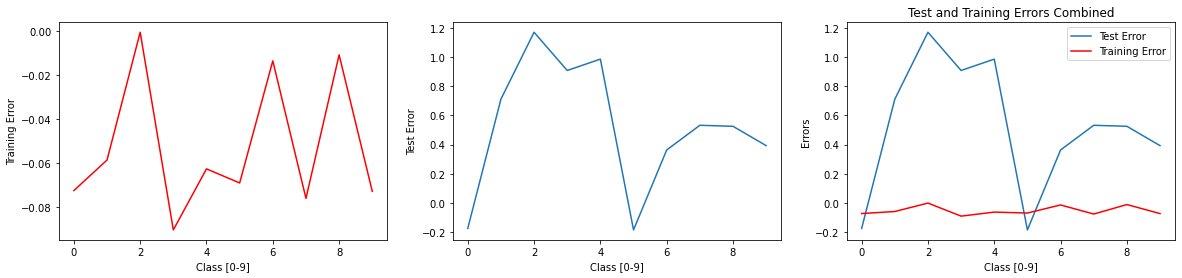

In [80]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.plot(range(0,10),cost_list,'r')
plt.xlabel('Class [0-9]')
plt.ylabel('Training Error')
plt.subplot(1,3,2)
plt.plot(range(0,10),cost_test)
plt.xlabel('Class [0-9]')
plt.ylabel('Test Error')
plt.subplot(1,3,3)
plt.plot(range(0,10),cost_test)
plt.plot(range(0,10),cost_list,'r')
plt.xlabel('Class [0-9]')
plt.legend(["Test Error", "Training Error"], loc ="upper right")
plt.ylabel('Errors')
plt.title('Test and Training Errors Combined')

In [82]:
reg_ind=[10,100,200,500,1000]
theta_list=[]
for j in range(len(reg_ind)):
    theta = np.zeros([X.shape[1], y1.shape[1]], dtype='float128')
    theta = gradient_descent(X, y1, theta, 0.02, 1500,reg_param=reg_ind[j])
    theta_list.append(theta)

In [83]:
cost_list_tr=[]
for j in range(len(reg_ind)):
    ct =0
    theta1 = pd.DataFrame(theta_list[j])
    for i in range(0, 10):
        cst = cost(X,y1.iloc[:, i],theta1.iloc[:,i],reg_ind[j])
        ct+=cst
    ct=ct/10
    cost_list_tr.append(ct)

In [84]:
cost_list_test=[]
for j in range(len(reg_ind)):
    ct =0
    theta1 = pd.DataFrame(theta_list[j])
    for i in range(0, 10):
        cst = cost(X_test,y_test.iloc[:, i],theta1.iloc[:,i],reg_ind[j])
        ct+=cst
    ct=ct/10
    cost_list_test.append(ct)

Text(0.5, 1.0, 'Test and Training Errors Combined')

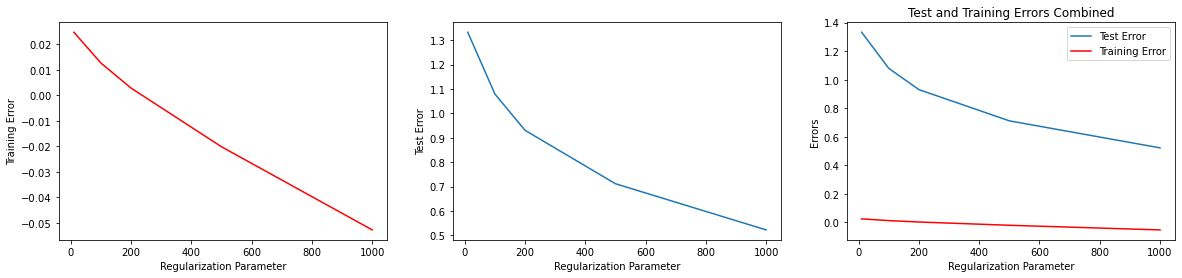

In [85]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.plot(reg_ind,cost_list_tr,'r')
plt.xlabel('Regularization Parameter')
plt.ylabel('Training Error')
plt.subplot(1,3,2)
plt.plot(reg_ind,cost_list_test)
plt.xlabel('Regularization Parameter')
plt.ylabel('Test Error')
plt.subplot(1,3,3)
plt.plot(reg_ind,cost_list_test)
plt.plot(reg_ind,cost_list_tr,'r')
plt.xlabel('Regularization Parameter')
plt.legend(["Test Error", "Training Error"], loc ="upper right")
plt.ylabel('Errors')
plt.title('Test and Training Errors Combined')